# Zadanie 1

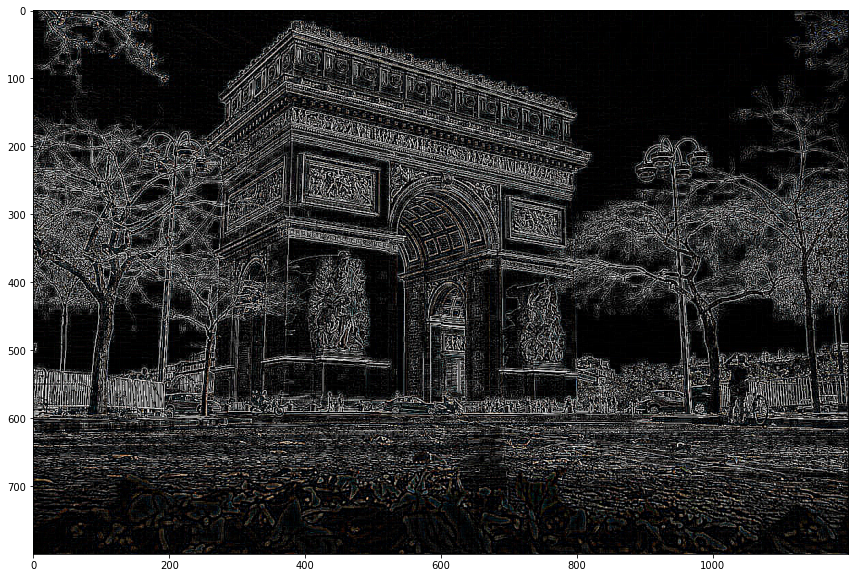

In [2]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt 

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

kernel = [ [-1, -1, -1], [-1, 8 , -1], [-1, -1, -1]]
kernel = np.asarray(kernel)
filtered_image = cv.filter2D(image, -1, kernel=kernel)

plt.rcParams['figure.figsize'] = (18, 10)
plt.imshow(filtered_image)

# Zadanie 2

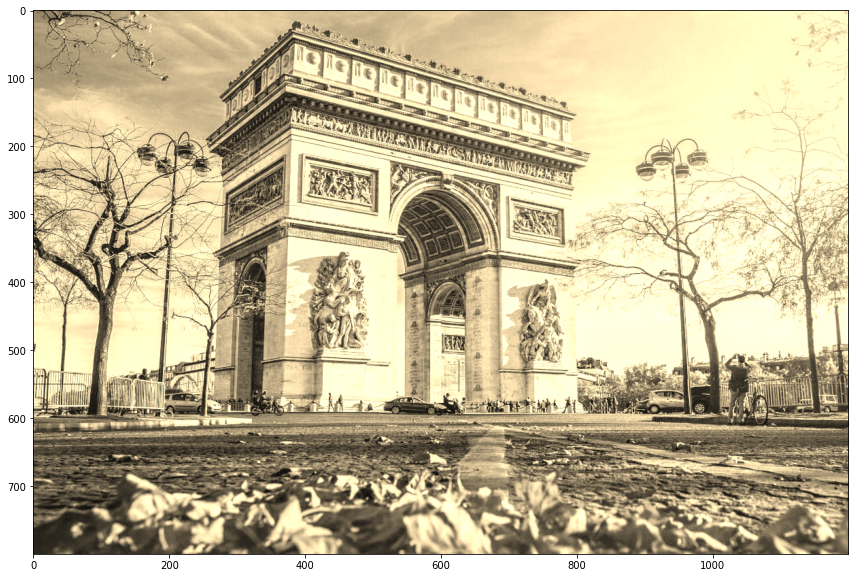

In [4]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt 

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = image * 1./255
image_copy = image.copy()

for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        image[x,y,0] = image_copy[x,y,0] * 0.393 + image_copy[x,y,1] * 0.769 + image_copy[x,y,2] * 0.189
        image[x,y,1] = image_copy[x,y,0] * 0.349 + image_copy[x,y,1] * 0.689 + image_copy[x,y,2] * 0.168
        image[x,y,2] = image_copy[x,y,0] * 0.272 + image_copy[x,y,1] * 0.534 + image_copy[x,y,2] * 0.131

image = np.clip(image, 0, 1)
plt.rcParams['figure.figsize'] = (18, 10)
plt.imshow(image)

# Zadanie 3

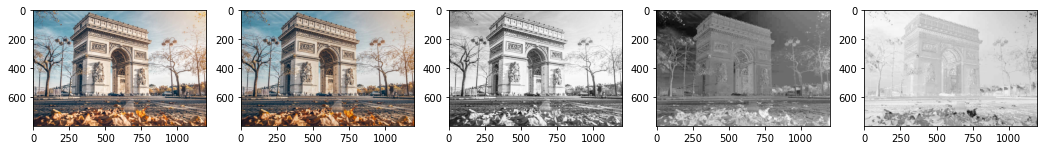

In [5]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(1, 5)
image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_copy = image.copy()

for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        image[x,y,0] = image_copy[x,y,0] * 0.229 + image_copy[x,y,1] * 0.587 + image_copy[x,y,2] * 0.114
        image[x,y,1] = image_copy[x,y,0] * 0.500 + image_copy[x,y,1] * (-0.418) + image_copy[x,y,2] * (-0.082) + 128
        image[x,y,2] = image_copy[x,y,0] * (-0.168) + image_copy[x,y,1] * (-0.331) + image_copy[x,y,2] * 0.500 + 128

image = np.clip(image, 0, 255)
imageRGB = cv.cvtColor(image, cv.COLOR_YCrCb2RGB)
ax[0].imshow(image_copy)
ax[1].imshow(imageRGB)
ax[2].imshow(image[:,:,0], cmap="Greys_r")
ax[3].imshow(image[:,:,1], cmap="Greys_r")
ax[4].imshow(image[:,:,2], cmap="Greys_r")

plt.show()

# Zadanie 4

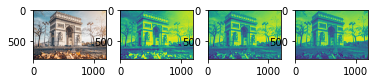

In [2]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(1, 4)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)
result_image = image.copy()

def upsample(up_image, down_image, x, y):
        up_image[x*2].append(down_image[x][y])
        up_image[x*2].append(down_image[x][y])
        up_image[x*2+1].append(down_image[x][y])
        up_image[x*2+1].append(down_image[x][y])

#DOWNSAMPLING
downsampled_image_cr = []
downsampled_image_cb = []
for x in range(0,image.shape[0],2):
    downsampled_image_cr.append([])
    downsampled_image_cb.append([])
    for y in range(0,image.shape[1],2):
        if x != 0:
            downsampled_image_cr[int(x/2)].append(image[x,y,1])
            downsampled_image_cb[int(x/2)].append(image[x,y,2])
        else:
            downsampled_image_cr[x].append(image[x,y,1])
            downsampled_image_cb[x].append(image[x,y,2])


#UPSAMPLING
upsampled_image_cr = []
upsampled_image_cb = []

# iterating over downsampled image height
for x in range(len(downsampled_image_cb)):
    #CR
    upsampled_image_cr.append([])
    upsampled_image_cr.append([])
    #CB
    upsampled_image_cb.append([])
    upsampled_image_cb.append([])

    # iterating over downsampled image width
    for y in range(len(downsampled_image_cb[0])):
        #CR
        upsample(upsampled_image_cr,downsampled_image_cr,x,y)
        #CB
        upsample(upsampled_image_cb,downsampled_image_cb,x,y)
 
for x in range(result_image.shape[0]):
    for y in range(result_image.shape[1]):
        result_image[x,y,1] = upsampled_image_cr[x][y]
        result_image[x,y,2] = upsampled_image_cb[x][y] 

        
result_image = cv.cvtColor(result_image, cv.COLOR_YCrCb2RGB)

ax[0].imshow(result_image)
ax[1].imshow(result_image[:,:,0])
ax[2].imshow(result_image[:,:,1])
ax[3].imshow(result_image[:,:,2])

plt.show() 

# Zadanie 5

In [3]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt 

image = cv.imread("images/example.jpg")
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)
result_image = image.copy()

def upsample(up_image, down_image, x, y):
        up_image[x*2].append(down_image[x][y])
        up_image[x*2].append(down_image[x][y])
        up_image[x*2+1].append(down_image[x][y])
        up_image[x*2+1].append(down_image[x][y])

#DOWNSAMPLING
downsampled_image_cr = []
downsampled_image_cb = []
for x in range(0,image.shape[0],2):
    downsampled_image_cr.append([])
    downsampled_image_cb.append([])
    for y in range(0,image.shape[1],2):
        if x != 0:
            downsampled_image_cr[int(x/2)].append(image[x,y,1])
            downsampled_image_cb[int(x/2)].append(image[x,y,2])
        else:
            downsampled_image_cr[x].append(image[x,y,1])
            downsampled_image_cb[x].append(image[x,y,2])


#UPSAMPLING
upsampled_image_cr = []
upsampled_image_cb = []

# iterating over downsampled image height
for x in range(len(downsampled_image_cb)):
    #CR
    upsampled_image_cr.append([])
    upsampled_image_cr.append([])
    #CB
    upsampled_image_cb.append([])
    upsampled_image_cb.append([])

    # iterating over downsampled image width
    for y in range(len(downsampled_image_cb[0])):
        #CR
        upsample(upsampled_image_cr,downsampled_image_cr,x,y)
        #CB
        upsample(upsampled_image_cb,downsampled_image_cb,x,y)
 
for x in range(result_image.shape[0]):
    for y in range(result_image.shape[1]):
        result_image[x,y,1] = upsampled_image_cr[x][y]
        result_image[x,y,2] = upsampled_image_cb[x][y] 

        
result_image = cv.cvtColor(result_image, cv.COLOR_YCrCb2RGB)

def countMSE(image_in, image_out):
    sum = 0
    for x in range(image_in.shape[0]):
        for y in range(image_in.shape[1]):
            for z in range(3):
                sum += pow(int(image_in[x,y,z]) - int(image_out[x,y,z]), 2)
    MSE = (1/(int(image_in.shape[0])*int(image_in.shape[1])))*(1/3)*sum
    print("Błąd: {}".format(MSE))

countMSE(image_rgb,result_image)

Błąd: 3.9749972222222225
